In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [14]:
df = pd.read_csv('BostonHousing.csv').dropna()

X = df.drop('medv', axis=1)
y = df['medv']

X, y = X.values, y.values

split_index = int(len(X) * 0.8)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def compute_gradients(w, b, X_batch, y_batch):
    n = len(y_batch)
    y_pred = X_batch.dot(w) + b
    error = y_batch - y_pred
    dw = (-2 / n) * X_batch.T.dot(error)
    db = (-2 / n) * np.sum(error)
    return dw, db

def train(X, y, learning_rate=0.0001, epochs=10000):
    n_features = X.shape[1]
    w = np.zeros(n_features)
    b = 0.0

    history = []

    for i in range(epochs):
        dw, db = compute_gradients(w, b, X, y) 
        w -= learning_rate * dw
        b -= learning_rate * db

        if i % (epochs // 20) == 0:
            y_pred = X.dot(w) + b
            mse = mean_squared_error(y, y_pred)
            history.append(mse)
            print(f"Epoch: {i}, MSE: {mse:.4f}")
    
    return w, b, history


w_final, b_final, mse_history = train(X_train_scaled, y_train, epochs=100000, learning_rate=0.0001)

y_pred_test = X_test_scaled.dot(w_final) + b_final
test_mse = mean_squared_error(y_test, y_pred_test)

print("Trained model parameters:")
print(f"Weights (w): {w_final}")
print(f"Bias (b): {b_final:.4f}")
print(f"Test MSE: {test_mse:.4f}")

Epoch: 0, MSE: 671.6149
Epoch: 5000, MSE: 107.3431
Epoch: 10000, MSE: 35.6022
Epoch: 15000, MSE: 25.6506
Epoch: 20000, MSE: 24.0676
Epoch: 25000, MSE: 23.6789
Epoch: 30000, MSE: 23.4955
Epoch: 35000, MSE: 23.3708
Epoch: 40000, MSE: 23.2765
Epoch: 45000, MSE: 23.2034
Epoch: 50000, MSE: 23.1460
Epoch: 55000, MSE: 23.1006
Epoch: 60000, MSE: 23.0645
Epoch: 65000, MSE: 23.0356
Epoch: 70000, MSE: 23.0124
Epoch: 75000, MSE: 22.9937
Epoch: 80000, MSE: 22.9786
Epoch: 85000, MSE: 22.9662
Epoch: 90000, MSE: 22.9562
Epoch: 95000, MSE: 22.9480
Trained model parameters:
Weights (w): [-1.23113535  1.04181815  0.16937486  0.5583055  -1.64469661  3.51774509
  0.07479655 -2.81628055  2.63766421 -1.68606409 -1.78717356 -0.04992989
 -3.62806086]
Bias (b): 24.1927
Test MSE: 31.0931


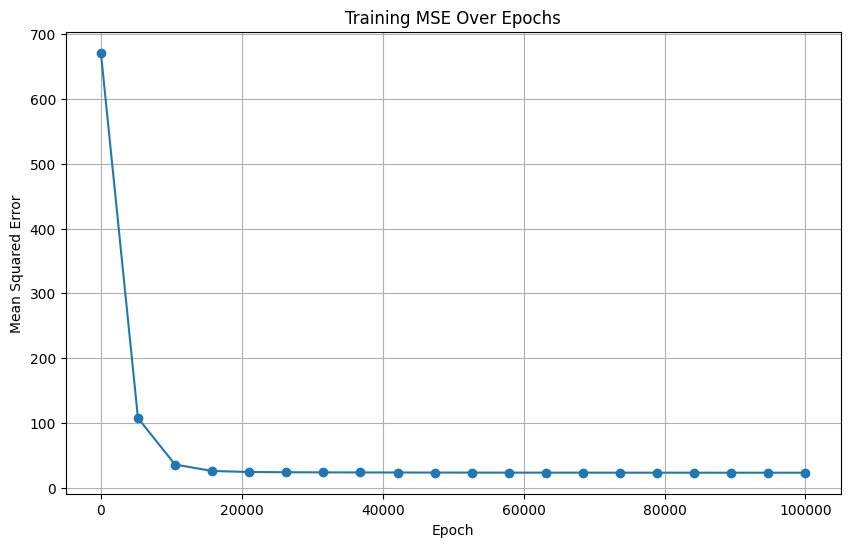

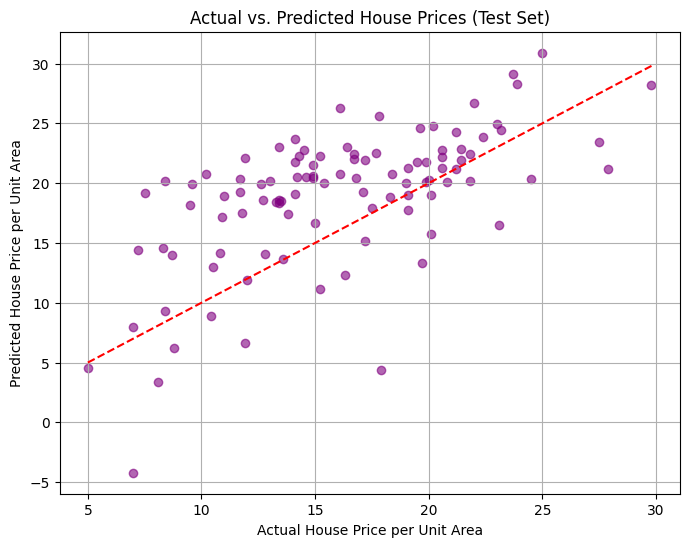

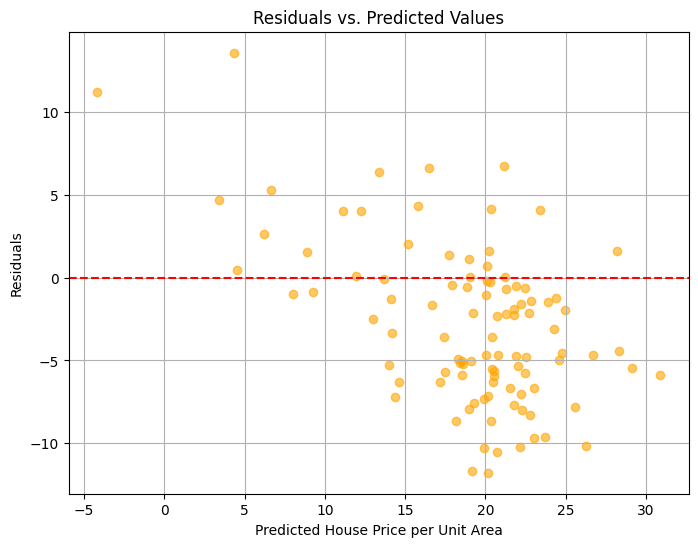

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(np.linspace(0, 100000, len(mse_history)), mse_history, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('Training MSE Over Epochs')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, alpha=0.6, color='purple')
plt.xlabel('Actual House Price per Unit Area')
plt.ylabel('Predicted House Price per Unit Area')
plt.title('Actual vs. Predicted House Prices (Test Set)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.grid(True)
plt.show()

residuals = y_test - y_pred_test
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_test, residuals, alpha=0.6, color='orange')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted House Price per Unit Area')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.grid(True)
plt.show()